In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import math
import os
import glob

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

## 0. 데이터 정리된 형태로 불러오기

전처리된 데이터들을 사용할 수 있도록 불러온다.

In [ ]:
# 2021
d2021 = pd.read_csv("/content/drive/MyDrive/2022_1 Urban Studies/@Dataset/Year_2021_data.csv")
data2021 = d2021.set_index('Unnamed: 0')
data2021 = data2021.iloc[:882]
# 2020
d2020 = pd.read_csv("/content/drive/MyDrive/2022_1 Urban Studies/@Dataset/Year_2020_data.csv", encoding='cp949')
data2020 = d2020.set_index('Unnamed: 0')
data2020 = data2020.iloc[:882]
# 2019
d2019 = pd.read_csv("/content/drive/MyDrive/2022_1 Urban Studies/@Dataset/Year_2019_data.csv")
data2019 = d2019.set_index('Unnamed: 0')
data2019 = data2019.iloc[:882]
# 2018
d2018 = pd.read_csv("/content/drive/MyDrive/2022_1 Urban Studies/@Dataset/Year_2018_data.csv")
data2018 = d2018.set_index('Unnamed: 0')
data2018 = data2018.iloc[:882]
# 2017
d2017 = pd.read_csv("/content/drive/MyDrive/2022_1 Urban Studies/@Dataset/Year_2017_data.csv")
data2017 = d2017.set_index('Unnamed: 0')
data2017 = data2017.iloc[:882]

# 상권코드
code2name = pd.read_csv("/content/drive/MyDrive/2022_1 Urban Studies/@Dataset/상권코드.csv")
code_transl = code2name.set_index('neighbor_code')
code_transl = code_transl.iloc[:882]
code_transl
name_transl = dict(zip(list(code_transl['neighbor_name']), code_transl.index))

유사도를 계산하기 위해 유사도 계산의 벤치마크가 될 골목상권을 추출한다. 그 대상은 두 개의 필터를 통해 도출한다.
- Filter1 : *2021년 현재 203040대 매출액 크기가 0.15이상인 것*
- Filter2 : *2017 - 2021년 203040대 매출금액 성장률이 가장 큰 Top 5*

In [ ]:
# Filter1 : 2021년 203040 매출의 크기가 0.15 이상인 것
index_val = data2017.sort_values('2340대_매출금액', ascending=False).head(50).index[:1000039]


# Filter2 :  2017 - 2021년 203040대 매출금액 성장률이 가장 큰 Top 5
growth_list = []
for i in range(len(index_val)) :
  index = index_val[i]
  try :
   growth =  (data2021['2340대_매출금액'].loc[index] - data2017['2340대_매출금액'].loc[index]) / data2017['2340대_매출금액'].loc[index]
   name = list(code_transl.loc[index])[0]
   growth_list.append([index, name, growth * 100])
  except :
    pass

df_growth_rate = pd.DataFrame(growth_list, columns=['neighbor_code', 'neighbor_name', 'growth_rate'])

도출된 Top 5 : 아차산로15길[1000114] / 도봉로114길[1000360] / 녹사평대로32길 [1000052] / 동교로38길[1000470] 

In [ ]:
test_list = [1000114, 1000360, 1000052, 1000470]

data2017.loc[test_list]

,T_remainpop,T_commuterpop,commercial_facility_count,subwayst_count,busst_count,분기당_매출_금액,2340대_매출금액,영업기간/서울평균,폐업기간/서울평균
Unnamed: 0,,,,,,,,,
1000114,394.0,4070.0,3.0,0.0,1.0,471.441604,0.107619,0.83,0.94
1000360,4971.0,475.0,37.0,0.0,4.0,632.760860,0.147422,0.90,0.93
1000052,612.0,315.0,2.0,0.0,0.0,563.854437,0.142768,1.17,1.18
1000470,1561.0,250.0,15.0,0.0,0.0,927.468292,0.260711,0.33,0.93


## 1. 정규화
데이터가 반영될 시, 편향을 최소화하기 위해 정규화 진행.

In [ ]:
scaler = MinMaxScaler()

arr2021 = scaler.fit_transform(data2021)
arr2020 = scaler.fit_transform(data2020)
arr2019 = scaler.fit_transform(data2019)
arr2018 = scaler.fit_transform(data2018)
arr2017 = scaler.fit_transform(data2017)




## 2. 유사도 검증 및 예측 상권 도출

정규화된 데이터를 활용해 유사도 검증을 본격적으로 진행. 상기 도출한 5개 상권을 대상으로 각각 진행

In [ ]:
yearly_data = [data2017, data2018, data2019, data2020, data2021]

##### (1) 1000114 아차산로15길 2017년도 데이터 -- 2017~2021 데이터

In [ ]:
Itaewon54_yearly_data = []

for y in range(5):

  sim_Iteawon54 = cosine_similarity([data2017.loc[1000114]], yearly_data[y])
  sim_df = pd.DataFrame({'Code':yearly_data[y].index, 'Similarity':sim_Iteawon54[0]})
  sim_list = sim_df.sort_values('Similarity', ascending=False).iloc[:10].values.tolist()
  Itaewon54_yearly_data.append(sim_list)

# Itaewon54_yearly_data

##### (2) 1000360 도봉로114길 2017년도 데이터 -- 2017~2021 데이터


In [ ]:
Wangshimni14_yearly_data = []

for y in range(5):

  sim_Wangshimni14 = cosine_similarity([data2017.loc[1000360]], yearly_data[y])
  sim_df = pd.DataFrame({'Code':yearly_data[y].index, 'Similarity':sim_Wangshimni14[0]})
  sim_list = sim_df.sort_values('Similarity', ascending=False).iloc[:10].values.tolist()
  Wangshimni14_yearly_data.append(sim_list)

#Wangshimni14_yearly_data

##### (3) 1000052 녹사평대로32길 2017년도 데이터 -- 2017~2021 데이터

In [ ]:
Bukchon5_yearly_data = []

for y in range(5):

  sim_Bukchon5 = cosine_similarity([data2017.loc[1000052]], yearly_data[y])
  sim_df = pd.DataFrame({'Code':yearly_data[y].index, 'Similarity':sim_Bukchon5[0]})
  sim_list = sim_df.sort_values('Similarity', ascending=False).iloc[:10].values.tolist()
  Bukchon5_yearly_data.append(sim_list)

#Bukchon5_yearly_data

##### (4) 1000470 동교로38길 2017년도 데이터 -- 2017~2021 데이터

In [ ]:
Opesan67_yearly_data = []

for y in range(5):

  sim_Opesan67 = cosine_similarity([data2017.loc[1000342]], yearly_data[y])
  sim_df = pd.DataFrame({'Code':yearly_data[y].index, 'Similarity':sim_Opesan67[0]})
  sim_list = sim_df.sort_values('Similarity', ascending=False).iloc[:10].values.tolist()
  Opesan67_yearly_data.append(sim_list)

#Opesan67_yearly_data

## 3. 상권코드 상권명으로 보기 좋게 번역

{상권코드 : 상권명} 호출할 딕셔너리

In [ ]:
code_matrix = pd.read_csv("/content/drive/MyDrive/2022_1 Urban Studies/@Dataset/상권코드.csv")
code_transl = dict(zip(code_matrix['neighbor_code'], code_matrix['neighbor_name']))
#code_transl

##### (1)  1000114 아차산로15길 2017년도 데이터 Translation

In [ ]:
Itaewon54_transl = []

for year in range(len(Itaewon54_yearly_data)) : 
  rank_list = []

  for rank in range(len(Itaewon54_yearly_data[year])) :
    transl = code_transl[Itaewon54_yearly_data[year][rank][0]]
    value = Itaewon54_yearly_data[year][rank][1]
    transl_list = [transl, value]
    rank_list.append(transl_list)

  Itaewon54_transl.append(rank_list)

#Itaewon54_transl

##### (2) 1000360 도봉로114길 2017년도 데이터 Translation

In [ ]:
Wangshimni14_transl = []

for year in range(len(Wangshimni14_yearly_data)) : 
  rank_list = []

  for rank in range(len(Wangshimni14_yearly_data[year])) :
    transl = code_transl[Wangshimni14_yearly_data[year][rank][0]]
    value = Wangshimni14_yearly_data[year][rank][1]
    transl_list = [transl, value]
    rank_list.append(transl_list)

  Wangshimni14_transl.append(rank_list)

#Wangshimni14_transl

##### (3) 1000052 녹사평대로32길 2017년도 데이터 데이터 Translation

In [ ]:
Bukchon5_transl = []

for year in range(len(Bukchon5_yearly_data)) : 
  rank_list = []

  for rank in range(len(Bukchon5_yearly_data[year])) :
    transl = code_transl[Bukchon5_yearly_data[year][rank][0]]
    value = Bukchon5_yearly_data[year][rank][1]
    transl_list = [transl, value]
    rank_list.append(transl_list)

  Bukchon5_transl.append(rank_list)

#Bukchon5_transl

##### (4) 1000470 동교로38길 2017년도 데이터 Translation

In [ ]:
Opesan67_transl = []

for year in range(len(Opesan67_yearly_data)) : 
  rank_list = []

  for rank in range(len(Opesan67_yearly_data[year])) :
    transl = code_transl[Opesan67_yearly_data[year][rank][0]]
    value = Opesan67_yearly_data[year][rank][1]
    transl_list = [transl, value]
    rank_list.append(transl_list)

  Opesan67_transl.append(rank_list)

#Opesan67_transl

## 4. 예측값 데이터 시각화

### (1) 1000114 아차산로15길 2017년도 데이터와 유사도가 높았던 항목 도출

In [ ]:
count = []
for year in range(len(Itaewon54_yearly_data)) :
  for rank in range(len(Itaewon54_yearly_data[year])) :
    name = code_transl[Itaewon54_yearly_data[year][rank][0]]
    count.append(name)
  
pd.DataFrame(count).value_counts()-1

성수이로18길      4
아차산로11길      4
경인로80길       4
논현로26길       3
아차산로15길      3
충정로6길        2
논현로28길       2
종로24길        2
충정로4길        1
율곡로10길       1
강남대로23길      1
서초중앙로8길      1
명동길          1
남부순환로339길    1
한강대로52길      1
성수일로6길       0
삼일대로4길       0
종암로19길       0
당산로37길       0
dtype: int64

유사도가 0.96이 넘으면서, 두 해 이상 top 10에 들었던 항목 도출

In [ ]:
analysis_codes = [1000108, 1000113, 1000685, 1000900, 1000114, 1000452, 1000901, 1000017]
analysis_names = ['성수이로18길', '아차산로11길', '경인로80길', '논현로26길', '아차산로15길', '충정로6길', '논현로28길', '종로24길']

In [ ]:
loc = "/content/drive/MyDrive/2022_1 Urban Studies/@Dataset/추정매출데이터"
os.chdir(loc)
year_list = glob.glob("*.csv")

전체매출

In [ ]:
# 아이템별 2017~2021 전체매출 추이
items_total = []

for i in range(len(analysis_codes)) :
  year_progress = []

  for y in range(len(year_list)) :
    try:
      df_year = pd.read_csv(loc+'/'+year_list[y], index_col='neighbor_code')
      sales = list(df_year.loc[analysis_codes[i]])[0] # 0이면 전체매출, 1이면 203040매출
      year_progress.append(sales)
    except:
      df_year = pd.read_csv(loc+'/'+year_list[y], index_col='neighbor_code', encoding='cp949')
      sales = list(df_year.loc[analysis_codes[i]])[0]
      year_progress.append(sales)      

  items_total.append(year_progress)
items_total

[[133.4238288, 146.0871991, 119.5904598, 125.0957139, 108.1391621],
 [315.5543631, 382.953328, 423.1802111, 243.400718, 406.3531354],
 [33.33976475, 47.45667575, 19.405529, 46.5574845, 15.5681],
 [1037.165894, 1182.803111, 1369.055177, 1382.058466, 1509.697108],
 [471.441604, 447.3652374, 403.0131605, 401.925896, 989.6954109],
 [431.4969207, 433.6750033, 302.6922537, 217.0986271, 272.8386633],
 [477.6343734, 449.8598316, 287.9330798, 318.8672676, 354.9123029],
 [51.6850186, 95.62923875, 72.91111125, 109.3608165, 79.8306285]]

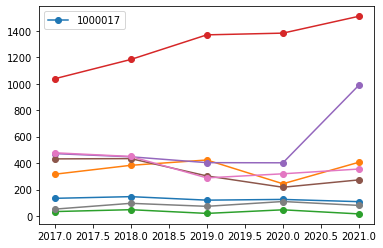

In [ ]:
from matplotlib import pyplot as plt

for i in range(len(items_total)) :

  X = [2017, 2018, 2019, 2020, 2021]
  Y1 = items_total[i] # 1000866의 전체 매출 변화 추이 (1)


  plt.plot(X,Y1, marker='o')
  plt.legend([analysis_codes[i]], loc=0)

plt.show()

### (4) 1000470 동교로38길 2017년도 데이터와 유사도가 높았던 항목 도출

In [ ]:
count = []
for year in range(len(Opesan67_yearly_data)) :
  for rank in range(len(Opesan67_yearly_data[year])) :
    name = code_transl[Opesan67_yearly_data[year][rank][0]]
    count.append(name)
  
pd.DataFrame(count).value_counts()-1

강동대로53길      2
남현3길         2
화곡로4길        2
남부순환로151길    1
상암로51길       1
천호대로109길     1
월드컵로11길      1
용마산로118길     1
영등포로35길      1
양평로19길       1
선릉로18길       1
아차산로65길      1
삼양로8길        1
서울시립대로4길     0
천호옛14길       0
동일로192길      0
조원로10길       0
자양로45길       0
마포대로20길      0
망우로18길       0
오패산로67길      0
오패산로4길       0
목동동로12길      0
영동대로112길     0
연서로5길        0
연서로29길       0
백제고분로21길     0
양재대로72길      0
답십리로69길      0
공항대로61길      0
세검정로1길       0
성균관로5길       0
삼성로115길      0
아차산로51길      0
dtype: int64

In [ ]:
analysis_codes = [1000967, 1000802, 1000685, 1000551,1000980, 1000165]
analysis_names = ['강동대로53길', '남현3길', '경인로80길', '화곡로4길', '상암로51길', '천호대로109길']

In [ ]:
# 아이템별 2017~2021 전체매출 추이
items_total = []

for i in range(len(analysis_codes)) :
  year_progress = []

  for y in range(len(year_list)) :
    try:
      df_year = pd.read_csv(loc+'/'+year_list[y], index_col='neighbor_code')
      sales = list(df_year.loc[analysis_codes[i]])[0] # 0이면 전체매출, 1이면 203040매출
      year_progress.append(sales)
    except:
      df_year = pd.read_csv(loc+'/'+year_list[y], index_col='neighbor_code', encoding='cp949')
      sales = list(df_year.loc[analysis_codes[i]])[0]
      year_progress.append(sales)      

  items_total.append(year_progress)
items_total

[[379.6453794, 367.1827206, 269.8675524, 278.3817583, 295.905504],
 [155.6081824, 130.9323038, 102.1514142, 117.3095714, 125.1616823],
 [33.33976475, 47.45667575, 19.405529, 46.5574845, 15.5681],
 [202.641014, 205.5490369, 143.9654176, 166.9804926, 157.5692984],
 [251.0519318, 287.2815074, 207.3871566, 236.9759743, 209.1110468],
 [278.2975534, 313.9552392, 258.4321348, 309.4455865, 201.2206032]]

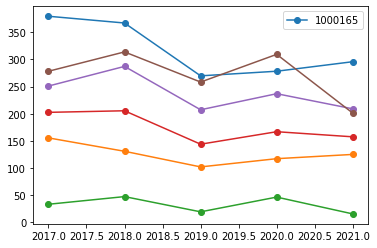

In [ ]:
from matplotlib import pyplot as plt

for i in range(len(items_total)) :

  X = [2017, 2018, 2019, 2020, 2021]
  Y1 = items_total[i] # 1000866의 전체 매출 변화 추이 (1)


  plt.plot(X,Y1, marker='o')
  plt.legend([analysis_codes[i]], loc=0)

plt.show()

### (2) 1000360 도봉로114길 2017년도 데이터와 유사도가 높았던 항목 도출

In [ ]:
count = []
for year in range(len(Wangshimni14_yearly_data)) :
  for rank in range(len(Wangshimni14_yearly_data[year])) :
    name = code_transl[Wangshimni14_yearly_data[year][rank][0]]
    count.append(name)
  
pd.DataFrame(count).value_counts()-1

상도로62길      2
신흥로20길      2
서오릉로8길      1
청룡길         1
고덕로10길      1
상도로61길      1
와우산로3길      1
세검정로1길      1
성북로8길       1
도봉로114길     1
화랑로14길      1
천장산로7길      0
인촌로1길       0
평창길         0
양천로26길      0
화곡로59길      0
신촌로37길      0
화랑로40길      0
휘경로3길       0
신목로2길       0
장군봉1길       0
가재울로6길      0
석계로1길       0
사가정로54길     0
북아현로4길      0
봉은사로29길     0
백제고분로21길    0
망원로11길      0
마조로1길       0
동일로123길     0
도봉산길        0
노해로60길      0
남부순환로97길    0
광성로6길       0
관악로30길      0
공항대로61길     0
흑석로9길       0
dtype: int64

In [ ]:
analysis_codes = []
analysis_names = ['상도로62길', '신흥로20길', '서오릉로8길', '청룡길', '상도로61길', '와우산로3길']

for i in range(len(analysis_names)) :
  name = analysis_names[i]
  analysis_codes.append(name_transl.get(name))
analysis_codes

[1000761, 1000061, 1000396, 1000834, 1000760, 1000496]

In [ ]:
loc = "/content/drive/MyDrive/2022_1 Urban Studies/@Dataset/추정매출데이터"
os.chdir(loc)
year_list = glob.glob("*.csv")

In [ ]:
# 아이템별 2017~2021 전체매출 추이
items_total = []

for i in range(len(analysis_codes)) :
  year_progress = []

  for y in range(len(year_list)) :
    try:
      df_year = pd.read_csv(loc+'/'+year_list[y], index_col='neighbor_code', encoding='cp949')
      sales = list(df_year.loc[analysis_codes[i]])[0] # 0이면 전체매출, 1이면 203040매출
      year_progress.append(sales)
    except:
      df_year = pd.read_csv(loc+'/'+year_list[y], index_col='neighbor_code')
      sales = list(df_year.loc[analysis_codes[i]])[0]
      year_progress.append(sales)      

  items_total.append(year_progress)
items_total

[[427.5522419, 428.4647965, 465.6134699, 483.18685, 393.1335976],
 [354.2170958, 332.9379117, 272.2074619, 245.3382197, 188.8659952],
 [106.4696044, 126.2041874, 215.9003005, 247.2643715, 211.161807],
 [265.6531542, 258.6325065, 364.1265452, 368.2566488, 435.8471972],
 [627.3729465, 655.3647391, 297.2975544, 469.3974251, 242.7822478],
 [226.28681, 239.2340576, 175.3549919, 247.1177533, 132.8523122]]

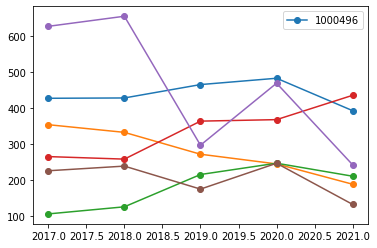

In [ ]:
from matplotlib import pyplot as plt

for i in range(len(items_total)) :

  X = [2017, 2018, 2019, 2020, 2021]
  Y1 = items_total[i] # 1000866의 전체 매출 변화 추이 (1)


  plt.plot(X,Y1, marker='o')
  plt.legend([analysis_codes[i]], loc=0)

plt.show()

### (3) 1000052 녹사평대로32길 2017년도 데이터와 유사도가 높았던 항목 도출

In [ ]:
count = []
for year in range(len(Bukchon5_yearly_data)) :
  for rank in range(len(Bukchon5_yearly_data[year])) :
    name = code_transl[Bukchon5_yearly_data[year][rank][0]]
    count.append(name)
  
pd.DataFrame(count).value_counts()-1

성지3길         2
녹사평대로32길     2
청파로47길       2
자하문로7길       2
인촌로24길       2
동교로38길       2
이태원로54길      2
북촌로5나길       2
와우산로29길      2
삼청로5길        1
한남대로20길      1
왕십리로14길      1
흑석로13길       1
사평대로22길      1
동소문로6길       1
논현로159길      1
관악로14길       1
공항대로38길      0
아차산로78길      0
동소문로15길      0
인촌로1길        0
도산대로15길      0
녹사평대로40나길    0
개운사길         0
dtype: int64

In [ ]:
analysis_codes = []
analysis_names = ['성지3길', '녹사평대로32길', '청파로47길', '자하문로7길', '인촌로24길', '동교로38길', '이태원로54길', '북촌로5나길', '와우산로29길']

for i in range(len(analysis_names)) :
  name = analysis_names[i]
  analysis_codes.append(name_transl.get(name))
analysis_codes

[1000485,
 1000052,
 1000073,
 1000016,
 1000292,
 1000470,
 1000071,
 1000008,
 1000495]

In [ ]:
# 아이템별 2017~2021 전체매출 추이
items_total = []

for i in range(len(analysis_codes)) :
  year_progress = []

  for y in range(len(year_list)) :
    try:
      df_year = pd.read_csv(loc+'/'+year_list[y], index_col='neighbor_code', encoding='cp949')
      sales = list(df_year.loc[analysis_codes[i]])[0] # 0이면 전체매출, 1이면 203040매출
      year_progress.append(sales)
    except:
      df_year = pd.read_csv(loc+'/'+year_list[y], index_col='neighbor_code')
      sales = list(df_year.loc[analysis_codes[i]])[0]
      year_progress.append(sales)      

  items_total.append(year_progress)
items_total

[[357.1788624, 382.214262, 443.9922743, 571.5392814, 457.4166821],
 [563.8544369, 788.6827852, 482.1332825, 586.4262602, 624.3399098],
 [1366.492771, 1292.988114, 1160.116, 1366.846947, 1008.255445],
 [873.9789429, 789.5516721, 355.6063715, 433.6725926, 703.3891298],
 [793.477032, 813.2590548, 389.0954966, 520.466057, 324.7352561],
 [927.4682916, 1255.084996, 911.9334496, 916.4480549, 982.6807933],
 [1787.433831, 2413.88005, 2022.16842, 1839.364579, 2190.484488],
 [762.1384643, 912.65683, 428.8157459, 515.4652517, 404.5606536],
 [672.2131284, 662.6782086, 363.5976245, 456.2689329, 272.6568461]]

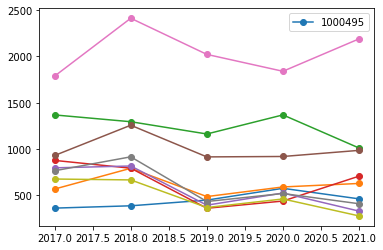

In [ ]:
from matplotlib import pyplot as plt

for i in range(len(items_total)) :

  X = [2017, 2018, 2019, 2020, 2021]
  Y1 = items_total[i] # 1000866의 전체 매출 변화 추이 (1)


  plt.plot(X,Y1, marker='o')
  plt.legend([analysis_codes[i]], loc=0)

plt.show()